In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
data = pd.read_excel('perfumedata.xlsx')
data.head()

,SINO,Synthetic Aroma Agent Name,Chemical Formula,Flavour of Aroma,Food,Causes/Effects,Natural Agents
0,1,Vanillin,C₈H₈O₃,Vanilla,Baked goods,Allergic Reaction,Vanilla beans
1,2,Ethyl Maltol,C₇H₈O₃,Caramel,Candies,Safety Approvals,Burnt sugar
2,3,Benzaldehyde,C₆H₅CHO,Almond,Marzipan,Irritation Effects,Bitter almonds
3,4,Isoamyl Acetate,C₇H₁₄O₂,Banana,Fruit snacks,Safety Approvals,Bananas
4,5,Cinnamaldehyde,C₉H₈O,Cinnamon,Chewing gum,Irritation effects,Cinnamon bark


In [ ]:
data.isnull().sum()

SINO                          0
Synthetic Aroma Agent Name    0
Chemical Formula              0
Flavour of Aroma              0
Food                          0
Causes/Effects                0
Natural Agents                0
dtype: int64

In [ ]:
data.duplicated().sum()

0

In [ ]:
data.drop_duplicates(inplace=True)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 7 columns):
 #   Column                      Non-Null Count  Dtype 
---  ------                      --------------  ----- 
 0   SINO                        50 non-null     int64 
 1   Synthetic Aroma Agent Name  50 non-null     object
 2   Chemical Formula            50 non-null     object
 3   Flavour of Aroma            50 non-null     object
 4   Food                        50 non-null     object
 5   Causes/Effects              50 non-null     object
 6   Natural Agents              50 non-null     object
dtypes: int64(1), object(6)
memory usage: 2.9+ KB


In [ ]:
data.isna().any()

SINO                          False
Synthetic Aroma Agent Name    False
Chemical Formula              False
Flavour of Aroma              False
Food                          False
Causes/Effects                False
Natural Agents                False
dtype: bool

In [ ]:
import pandas as pd
data = pd.read_excel('perfumedata.xlsx')
irritation_effects = data[data['Causes/Effects'].str.contains('Irritation', case=False)]
print(irritation_effects)

    SINO Synthetic Aroma Agent Name Chemical Formula Flavour of Aroma  \
2      3               Benzaldehyde          C₆H₅CHO           Almond   
4      5             Cinnamaldehyde            C₉H₈O         Cinnamon   
16    17                   Linalool          C₁₀H₁₈O         Lavender   
27    28            Allyl Hexanoate          C₉H₁₆O₂        Pineapple   
32    33            Pentyl Butyrate          C₉H₁₈O₂          Apricot   
38    39                    Decanal          C₁₀H₂₀O      Citrus peel   
45    46                α-Terpineol          C₁₀H₁₈O            Lilac   
48    49                    Nerolin         C₁₀H₁₀O₂   Orange blossom   

                     Food      Causes/Effects    Natural Agents  
2                Marzipan  Irritation Effects    Bitter almonds  
4             Chewing gum  Irritation effects     Cinnamon bark  
16                   Teas  Irritation Effects  Lavender flowers  
27        Flavored syrups  Irritation Effects    Pineapple pulp  
32        Fr

In [ ]:
import pandas as pd
data = pd.read_excel('perfumedata.xlsx')
effects_to_keep = [
    'Irritation Effects',
    'Allergic Reaction',
    'Systemic Toxicity',
    'Specialized Effects',
    'Safety Approvals'
]
other_effects = data[~data['Causes/Effects'].isin(effects_to_keep)]
unique_other_effects = other_effects['Causes/Effects'].unique()
print(unique_other_effects)


['Irritation effects' 'specialized Effects' 'Specified Effects'
 'systemic Toxicity' 'safety Approvals' 'irritation Effects'
 'allergic Reaction']


In [ ]:
import pandas as pd
data = pd.read_excel('perfumedata.xlsx')
replacement_mapping = {
    'irritation effects': 'Irritation Effects',
    'specialized effects': 'Specialized Effects',
    'specified effects': 'Specialized Effects',  # Assuming this is a typo
    'systemic toxicity': 'Systemic Toxicity',
    'safety approvals': 'Safety Approvals',
    'irritation effects': 'Irritation Effects',
    'allergic reaction': 'Allergic Reaction'
}
data['Causes/Effects'] = data['Causes/Effects'].str.lower()
data['Causes/Effects'] = data['Causes/Effects'].replace(replacement_mapping)
print(data['Causes/Effects'].unique())


['Allergic Reaction' 'Safety Approvals' 'Irritation Effects'
 'Systemic Toxicity' 'Specialized Effects']


In [ ]:
effect_counts = data['Causes/Effects'].value_counts()
print(effect_counts)

Causes/Effects
Safety Approvals       16
Allergic Reaction      13
Irritation Effects      8
Systemic Toxicity       7
Specialized Effects     6
Name: count, dtype: int64


In [ ]:
effects_list = [
    'Irritation Effects',
    'Allergic Reaction',
    'Systemic Toxicity',
    'Specialized Effects',
    'Safety Approvals'
]
effects_dict = {effect: [] for effect in effects_list}
for effect in effects_list:
    chemical_names = data[data['Causes/Effects'] == effect]['Synthetic Aroma Agent Name'].tolist()
    effects_dict[effect] = chemical_names
new_table = pd.DataFrame(dict([(k, pd.Series(v)) for k, v in effects_dict.items()]))
print(new_table)


   Irritation Effects   Allergic Reaction  Systemic Toxicity  \
0        Benzaldehyde            Vanillin  Methyl Salicylate   
1      Cinnamaldehyde            Limonene           Diacetyl   
2            Linalool      Ethyl Vanillin  Ethyl Isovalerate   
3     Allyl Hexanoate              Citral    Ethyl Cyclotene   
4     Pentyl Butyrate      Hexyl Cinnamal   Ethyl Propionate   
5             Decanal            Geraniol           Furfural   
6         α-Terpineol            β-Ionone     p-Anisaldehyde   
7             Nerolin    Methyl Cinnamate                NaN   
8                 NaN           Valencene                NaN   
9                 NaN       β-Damascenone                NaN   
10                NaN       Octyl Acetate                NaN   
11                NaN  Phenylacetaldehyde                NaN   
12                NaN      γ-Jasmolactone                NaN   
13                NaN                 NaN                NaN   
14                NaN                 Na

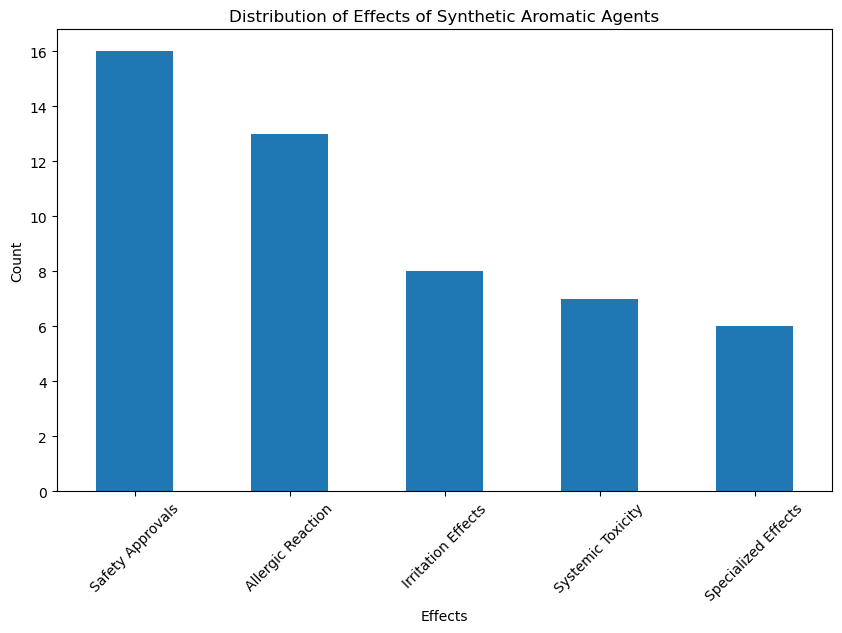

In [ ]:
effect_counts = data['Causes/Effects'].value_counts()
plt.figure(figsize=(10, 6))
effect_counts.plot(kind='bar')
plt.title('Distribution of Effects of Synthetic Aromatic Agents')
plt.xlabel('Effects')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


In [ ]:
print(data['Flavour of Aroma'].unique())  
print(data['Causes/Effects'].unique())  

['Vanilla' 'Caramel' 'Almond' 'Banana' 'Cinnamon' 'Citrus' 'Wintergreen'
 'Pineapple' 'Coconut' 'Butter' 'Mint' 'Strawberry' 'Buttery' 'Grape'
 'Clove' 'Lavender' 'Lemon' 'Jasmine' 'Licorice' 'Peach' 'Apple' 'Pear'
 'Honey' 'Rose' 'Maple' 'Smoky' 'Green grass' 'Creamy' 'Apricot' 'Rum'
 'Violet' 'Cheese' 'Orange' 'Citrus peel' 'Rose-wine' 'Popcorn' 'Hawthorn'
 'Lilac' 'Hyacinth' 'Orange blossom']
['Allergic Reaction' 'Safety Approvals' 'Irritation Effects'
 'Systemic Toxicity' 'Specialized Effects']


In [ ]:
flavor_effects = data.groupby('Flavour of Aroma')['Causes/Effects'].value_counts().unstack()
print(flavor_effects.head())

Causes/Effects    Allergic Reaction  Irritation Effects  Safety Approvals  \
Flavour of Aroma                                                            
Almond                          NaN                 1.0               NaN   
Apple                           NaN                 NaN               NaN   
Apricot                         NaN                 1.0               NaN   
Banana                          NaN                 NaN               1.0   
Butter                          NaN                 NaN               NaN   

Causes/Effects    Specialized Effects  Systemic Toxicity  
Flavour of Aroma                                          
Almond                            NaN                1.0  
Apple                             NaN                1.0  
Apricot                           NaN                NaN  
Banana                            NaN                NaN  
Butter                            NaN                1.0  


Unique Flavors: ['Vanilla' 'Caramel' 'Almond' 'Banana' 'Cinnamon' 'Citrus' 'Wintergreen'
 'Pineapple' 'Coconut' 'Butter' 'Mint' 'Strawberry' 'Buttery' 'Grape'
 'Clove' 'Lavender' 'Lemon' 'Jasmine' 'Licorice' 'Peach' 'Apple' 'Pear'
 'Honey' 'Rose' 'Maple' 'Smoky' 'Green grass' 'Creamy' 'Apricot' 'Rum'
 'Violet' 'Cheese' 'Orange' 'Citrus peel' 'Rose-wine' 'Popcorn' 'Hawthorn'
 'Lilac' 'Hyacinth' 'Orange blossom']
Unique Effects: ['Allergic Reaction' 'Safety Approvals' 'Irritation Effects'
 'Systemic Toxicity' 'Specialized Effects']


   Flavour of Aroma       Causes/Effects  Count
0            Almond   Irritation Effects      1
1            Almond    Systemic Toxicity      1
2             Apple    Systemic Toxicity      1
3           Apricot   Irritation Effects      1
4            Banana     Safety Approvals      1
5            Butter    Systemic Toxicity      1
6           Buttery     Safety Approvals      2
7           Caramel     Safety Approvals      1
8            Cheese  Specializ

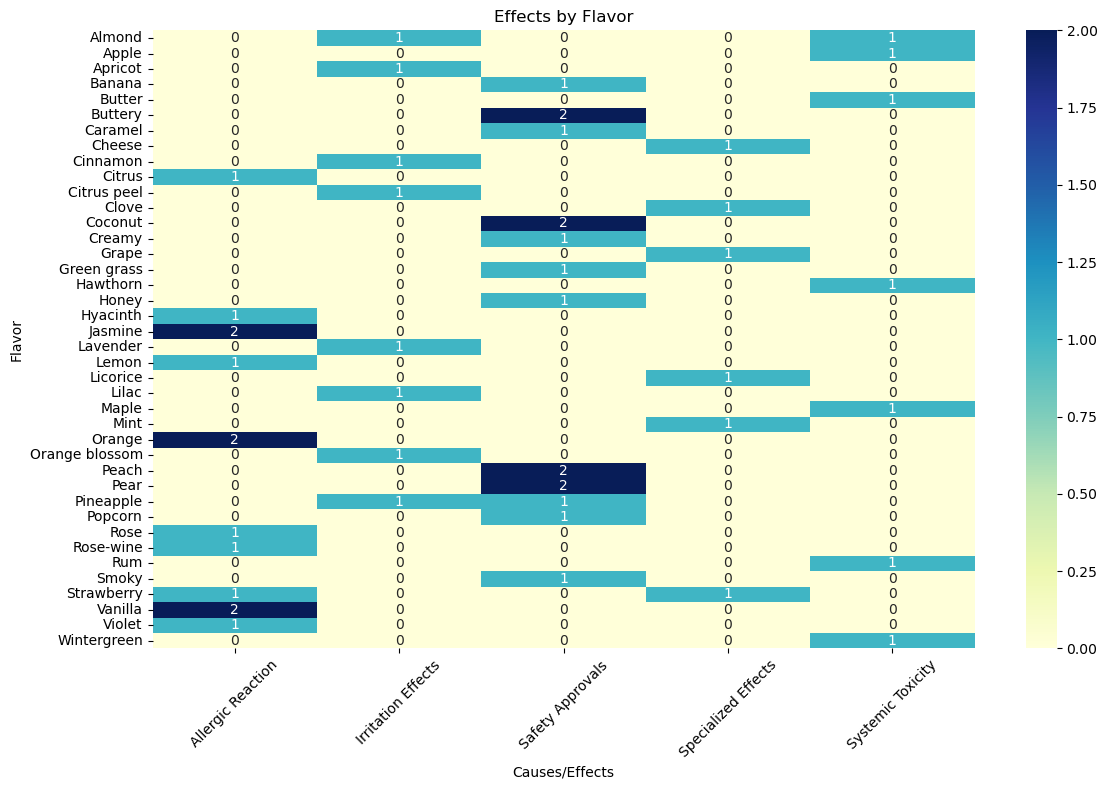

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt


unique_flavors = data['Flavour of Aroma'].unique()
unique_effects = data['Causes/Effects'].unique()

print(f"Unique Flavors: {unique_flavors}")
print(f"Unique Effects: {unique_effects}")

print('\n')
flavor_effect_counts = data.groupby(['Flavour of Aroma', 'Causes/Effects']).size().reset_index(name='Count')
print(flavor_effect_counts)

pivot_table = flavor_effect_counts.pivot(index='Flavour of Aroma', columns='Causes/Effects', values='Count').fillna(0)

plt.figure(figsize=(12, 8))
sns.heatmap(pivot_table, annot=True, fmt=".0f", cmap="YlGnBu")
plt.title('Effects by Flavor')
plt.xlabel('Causes/Effects')
plt.ylabel('Flavor')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


Unique Food Types: ['Baked goods' 'Candies' 'Marzipan' 'Fruit snacks' 'Chewing gum'
 'Beverages' 'Topical creams' 'Juices' 'Creams' 'Popcorn' 'Toothpaste'
 'Ice cream' 'Jams' 'Margarine' 'Sodas' 'Dental products' 'Teas'
 'Cleaners' 'Perfumes' 'Absinthe' 'Yogurt' 'E-liquids' 'Tropical snacks'
 'Cereals' 'Cosmetics' 'Bakery' 'Flavored syrups' 'Pancake syrup'
 'BBQ sauce' 'Herbal teas' 'Dairy substitutes' 'Fruit preserves'
 'Confectionery' 'Luxury chocolates' 'Snack seasonings' 'Gelatin desserts'
 'Citrus drinks' 'Cleaning agents' 'Bread flavoring' 'Alcoholic beverages'
 'Savory snacks' 'Microwave popcorn' 'Herbal medicines' 'Air fresheners'
 'Floral flavors' 'Mediterranean cuisine' 'High-end perfumes']
Unique Effects: ['Allergic Reaction' 'Safety Approvals' 'Irritation Effects'
 'Systemic Toxicity' 'Specialized Effects']


                     Food       Causes/Effects  Count
0                Absinthe  Specialized Effects      1
1          Air fresheners   Irritation Effects      1
2    

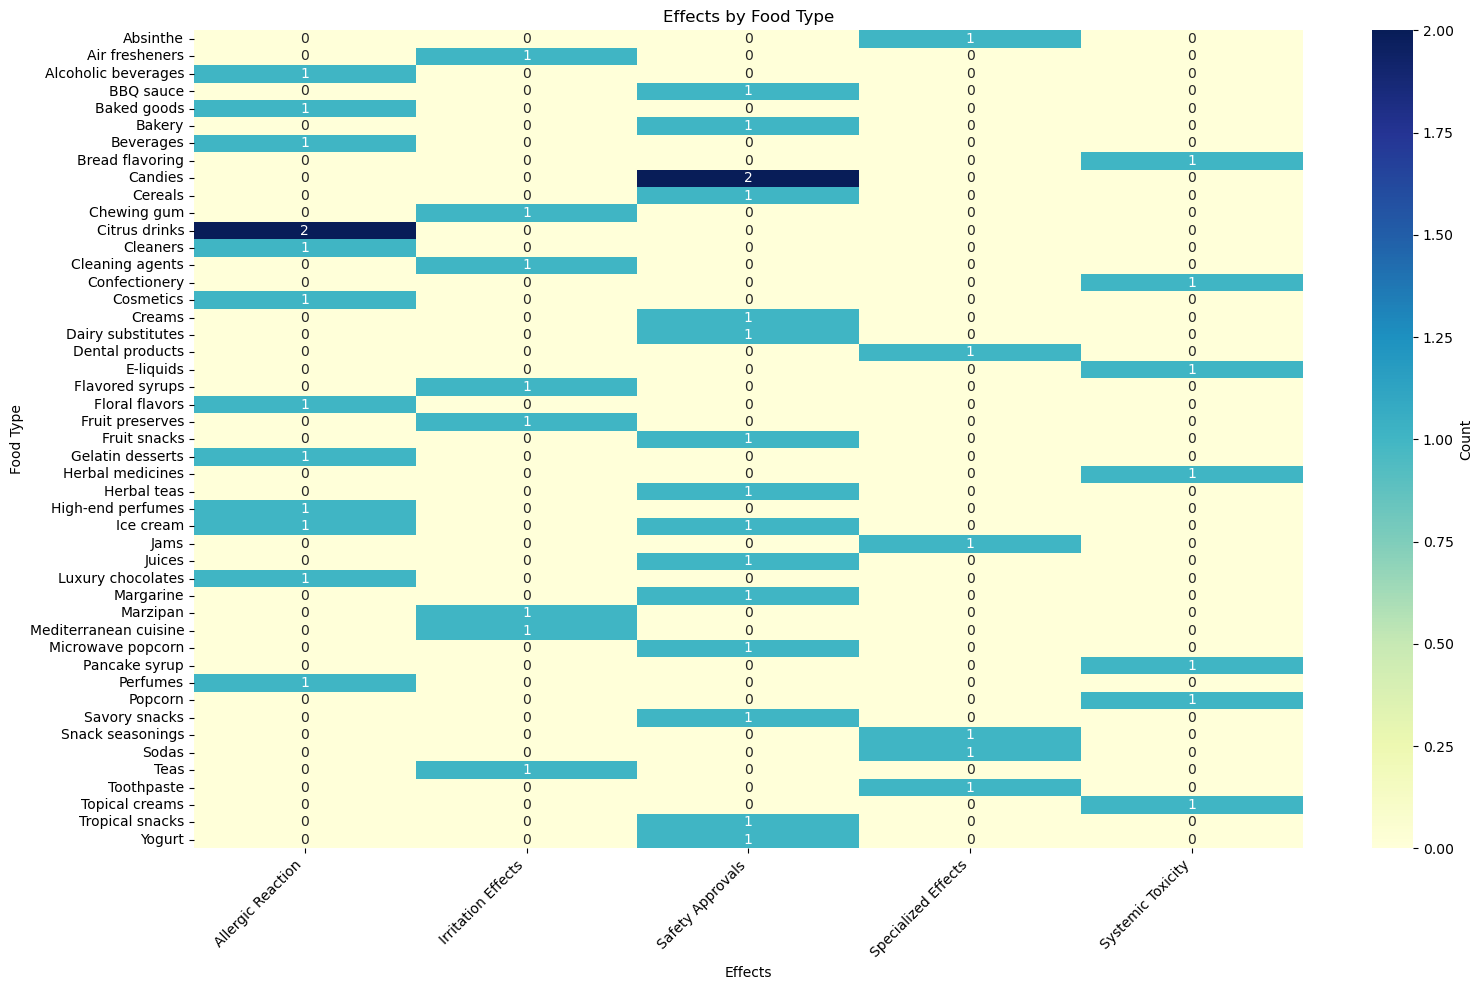

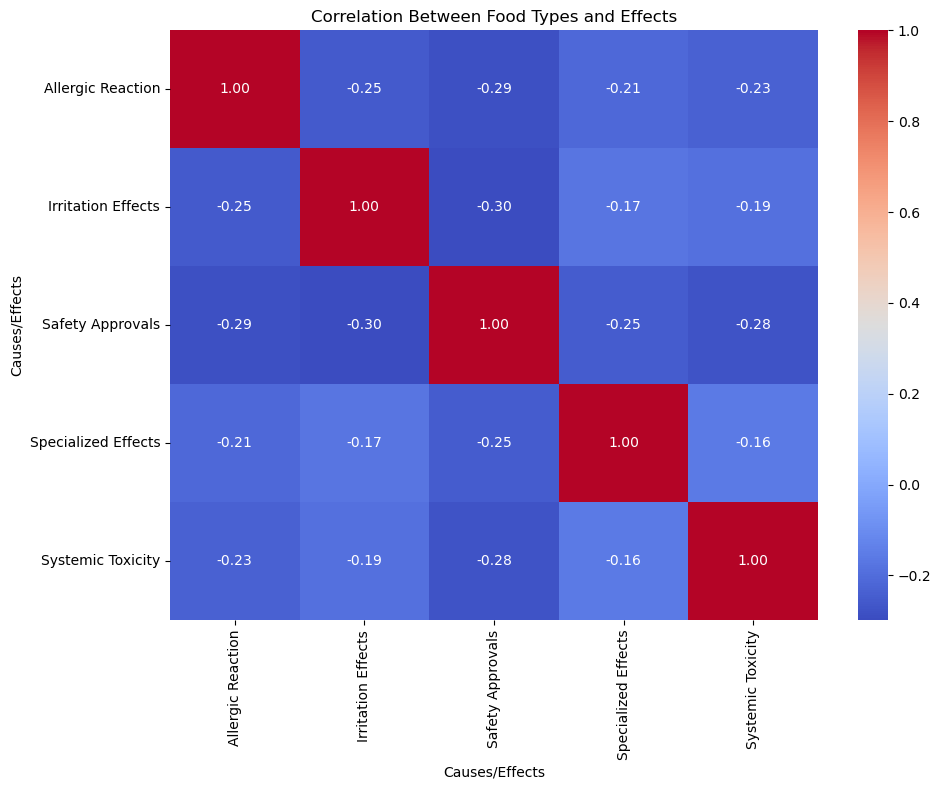

In [ ]:

unique_food_types = data['Food'].unique()
unique_effects = data['Causes/Effects'].unique()

print(f"Unique Food Types: {unique_food_types}")
print(f"Unique Effects: {unique_effects}")

print('\n')
food_effect_counts = data.groupby(['Food', 'Causes/Effects']).size().reset_index(name='Count')
print(food_effect_counts)

pivot_table = food_effect_counts.pivot(index='Food', columns='Causes/Effects', values='Count').fillna(0)

correlation_matrix = pivot_table.corr()

plt.figure(figsize=(16, 10))  # Increase the figure size
sns.heatmap(pivot_table, annot=True, fmt=".0f", cmap="YlGnBu", cbar_kws={'label': 'Count'})
plt.title('Effects by Food Type')
plt.xlabel('Effects')
plt.ylabel('Food Type')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm")
plt.title('Correlation Between Food Types and Effects')
plt.tight_layout()
plt.show()


Number of Synthetic Aroma Agents Causing Irritation: 13

Flavours of Synthetic Aroma Agents Causing Allergic:
['Vanilla' 'Citrus' 'Lemon' 'Jasmine' 'Rose' 'Violet' 'Strawberry'
 'Orange' 'Rose-wine' 'Hyacinth']

Natural replacement of Synthetic Aroma Agents Causing Allergic:
   Synthetic Aroma Agent Name          Natural Agents
0                    Vanillin           Vanilla beans
5                    Limonene             Orange peel
11             Ethyl Vanillin            Vanilla pods
17                     Citral              Lemongrass
18             Hexyl Cinnamal             Jasmine oil
25                   Geraniol                Rose oil
34                   β-Ionone          Violet flowers
36           Methyl Cinnamate      Strawberry extract
37                  Valencene        Valencia oranges
40              β-Damascenone               Rose hips
46              Octyl Acetate             Orange zest
47         Phenylacetaldehyde        Hyacinth flowers
49             γ-Jasmo

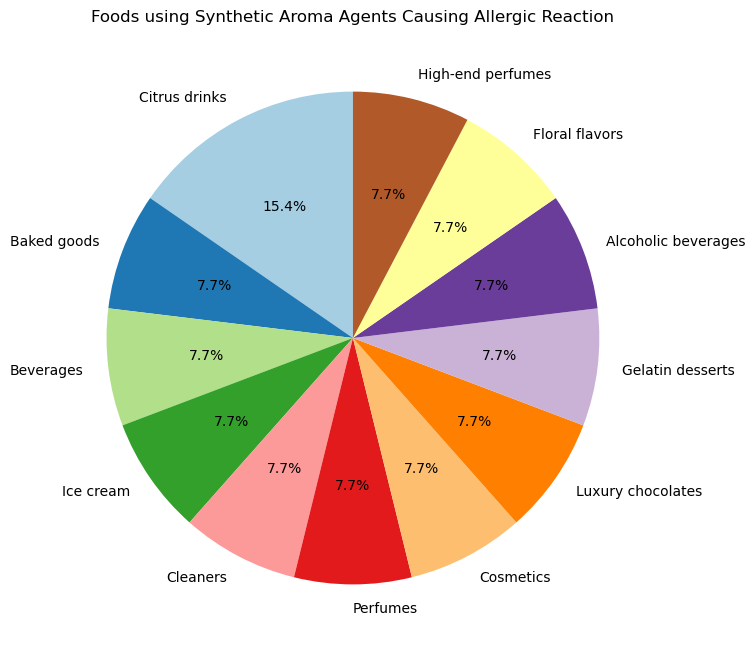

In [ ]:
irritation_data = df[df['Causes/Effects'].str.contains('Allergic Reaction')]

synthetic_count = len(irritation_data)
print(f'Number of Synthetic Aroma Agents Causing Irritation: {synthetic_count}')

flavours = irritation_data['Flavour of Aroma'].unique()
natural_agents = irritation_data['Natural Agents'].unique()

print("\nFlavours of Synthetic Aroma Agents Causing Allergic:")
print(flavours)

print("\nNatural replacement of Synthetic Aroma Agents Causing Allergic:")
irritation_data = df[df['Causes/Effects'].str.contains('Allergic Reaction', case=False)]
replacement_table = irritation_data[['Synthetic Aroma Agent Name', 'Natural Agents']]
print(replacement_table)

flavour_counts = irritation_data['Food'].value_counts()

plt.figure(figsize=(8, 8))
flavour_counts.plot(kind='pie', autopct='%1.1f%%', startangle=90, colors=plt.cm.Paired.colors)
plt.title('Foods using Synthetic Aroma Agents Causing Allergic Reaction')
plt.ylabel('') 
plt.show()

Number of Synthetic Aroma Agents Causing Irritation: 8

Flavours of Synthetic Aroma Agents Causing Irritation:
['Almond' 'Cinnamon' 'Lavender' 'Pineapple' 'Apricot' 'Citrus peel'
 'Lilac' 'Orange blossom']

Natural replacements of Synthetic Aroma Agents Causing Irritation:
   Synthetic Aroma Agent Name    Natural Agents
2                Benzaldehyde    Bitter almonds
4              Cinnamaldehyde     Cinnamon bark
16                   Linalool  Lavender flowers
27            Allyl Hexanoate    Pineapple pulp
32            Pentyl Butyrate     Apricot flesh
38                    Decanal       Orange rind
45                α-Terpineol    Lilac blossoms
48                    Nerolin   Orange blossoms


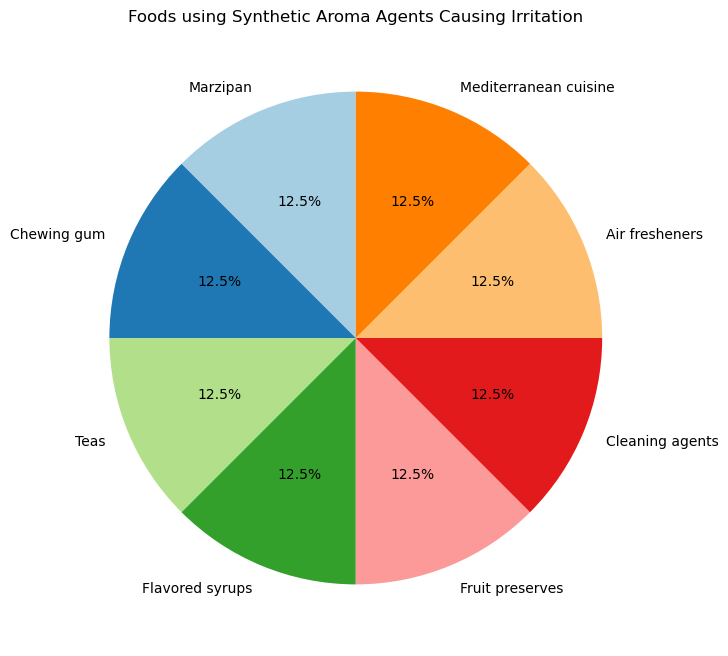

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
# Filter for agents with "Irritation Effects"
irritation_data = df[df['Causes/Effects'].str.contains('Irritation Effects', case=False)]

# Count the number of synthetic aroma agents causing irritation
synthetic_count = len(irritation_data)
print(f'Number of Synthetic Aroma Agents Causing Irritation: {synthetic_count}')

# Get unique flavours and natural agents
flavours = irritation_data['Flavour of Aroma'].unique()
natural_agents = irritation_data['Natural Agents'].unique()

print("\nFlavours of Synthetic Aroma Agents Causing Irritation:")
print(flavours)

print("\nNatural replacements of Synthetic Aroma Agents Causing Irritation:")
replacement_table = irritation_data[['Synthetic Aroma Agent Name', 'Natural Agents']]
print(replacement_table)

# Count occurrences of food items
flavour_counts = irritation_data['Food'].value_counts()

# Create a pie chart for visual representation
plt.figure(figsize=(8, 8))
flavour_counts.plot(kind='pie', autopct='%1.1f%%', startangle=90, colors=plt.cm.Paired.colors)
plt.title('Foods using Synthetic Aroma Agents Causing Irritation')
plt.ylabel('') 
plt.show()


Number of Synthetic Aroma Agents Causing Specialized Effects: 6

Flavours of Synthetic Aroma Agents Causing Specialized Effects:
['Mint' 'Strawberry' 'Grape' 'Clove' 'Licorice' 'Cheese']

Natural replacements of Synthetic Aroma Agents Causing Specialized Effects:
   Synthetic Aroma Agent Name  Natural Agents
10                    Menthol      Peppermint
12                   Furaneol    Strawberries
14        Methyl Anthranilate  Concord grapes
15                    Eugenol       Clove oil
19                   Anethole     Anise seeds
35            Isovaleric Acid    Aged cheeses


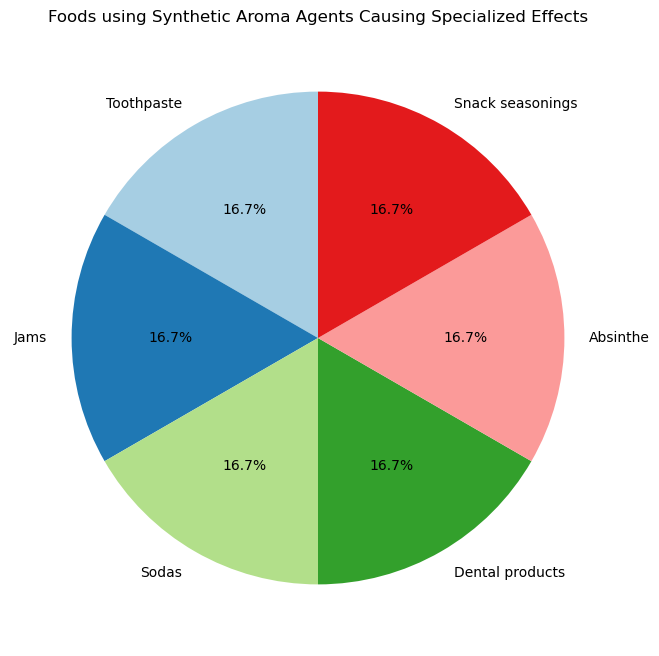

In [ ]:
# Filter for agents with "Specialized Effects"
specialized_data = df[df['Causes/Effects'].str.contains('Specialized Effects', case=False)]

# Count the number of synthetic aroma agents causing specialized effects
synthetic_count = len(specialized_data)
print(f'Number of Synthetic Aroma Agents Causing Specialized Effects: {synthetic_count}')

# Get unique flavours and natural agents
flavours = specialized_data['Flavour of Aroma'].unique()
natural_agents = specialized_data['Natural Agents'].unique()

print("\nFlavours of Synthetic Aroma Agents Causing Specialized Effects:")
print(flavours)

print("\nNatural replacements of Synthetic Aroma Agents Causing Specialized Effects:")
replacement_table = specialized_data[['Synthetic Aroma Agent Name', 'Natural Agents']]
print(replacement_table)

# Count occurrences of food items
flavour_counts = specialized_data['Food'].value_counts()

# Create a pie chart for visual representation
plt.figure(figsize=(8, 8))
flavour_counts.plot(kind='pie', autopct='%1.1f%%', startangle=90, colors=plt.cm.Paired.colors)
plt.title('Foods using Synthetic Aroma Agents Causing Specialized Effects')
plt.ylabel('') 
plt.show()


Number of Synthetic Aroma Agents Causing Systemic Toxicity: 7

Flavours of Synthetic Aroma Agents Causing Systemic Toxicity:
['Wintergreen' 'Butter' 'Apple' 'Maple' 'Rum' 'Almond' 'Hawthorn']

Natural replacements of Synthetic Aroma Agents Causing Systemic Toxicity:
   Synthetic Aroma Agent Name      Natural Agents
6           Methyl Salicylate  Wintergreen leaves
9                    Diacetyl      Cultured dairy
21          Ethyl Isovalerate              Apples
28            Ethyl Cyclotene           Maple sap
33           Ethyl Propionate       Fermented rum
39                   Furfural        Roasted nuts
44             p-Anisaldehyde         Anise seeds


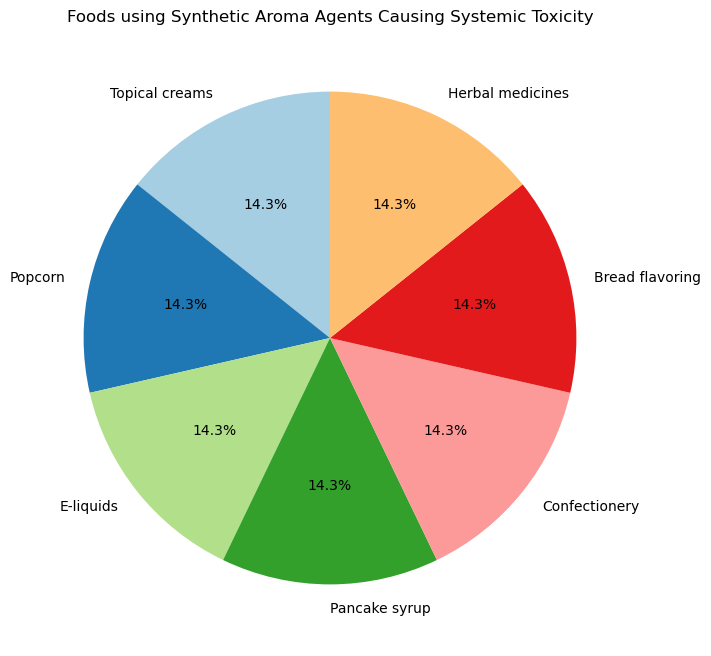

In [ ]:
toxicity_data = df[df['Causes/Effects'].str.contains('Systemic Toxicity', case=False)]

# Count the number of synthetic aroma agents causing system toxicity
synthetic_count = len(toxicity_data)
print(f'Number of Synthetic Aroma Agents Causing Systemic Toxicity: {synthetic_count}')

# Get unique flavours and natural agents
flavours = toxicity_data['Flavour of Aroma'].unique()
natural_agents = toxicity_data['Natural Agents'].unique()

print("\nFlavours of Synthetic Aroma Agents Causing Systemic Toxicity:")
print(flavours)

print("\nNatural replacements of Synthetic Aroma Agents Causing Systemic Toxicity:")
replacement_table = toxicity_data[['Synthetic Aroma Agent Name', 'Natural Agents']]
print(replacement_table)

# Count occurrences of food items
flavour_counts = toxicity_data['Food'].value_counts()

# Create a pie chart for visual representation
plt.figure(figsize=(8, 8))
flavour_counts.plot(kind='pie', autopct='%1.1f%%', startangle=90, colors=plt.cm.Paired.colors)
plt.title('Foods using Synthetic Aroma Agents Causing Systemic Toxicity')
plt.ylabel('') 
plt.show()


Number of Synthetic Aroma Agents with Safety Approvals: 16

Flavours of Synthetic Aroma Agents with Safety Approvals:
['Caramel' 'Banana' 'Pineapple' 'Coconut' 'Buttery' 'Peach' 'Pear' 'Honey'
 'Smoky' 'Green grass' 'Creamy' 'Popcorn']

Natural replacements of Synthetic Aroma Agents with Safety Approvals:
   Synthetic Aroma Agent Name    Natural Agents
1                Ethyl Maltol       Burnt sugar
3             Isoamyl Acetate           Bananas
7              Ethyl Butyrate         Pineapple
8               γ-Decalactone           Coconut
13                    Acetoin  Fermented butter
20            δ-Dodecalactone     Peach essence
22              γ-Nonalactone      Coconut milk
23             Propyl Acetate             Pears
24        Ethyl Phenylacetate         Bee honey
26         Ethyl Decadienoate      Pear essence
29             Ethyl Guaiacol        Wood smoke
30              Cis-3-Hexenol   Fresh cut grass
31              γ-Octalactone       Coconut oil
41           2-Acetyl

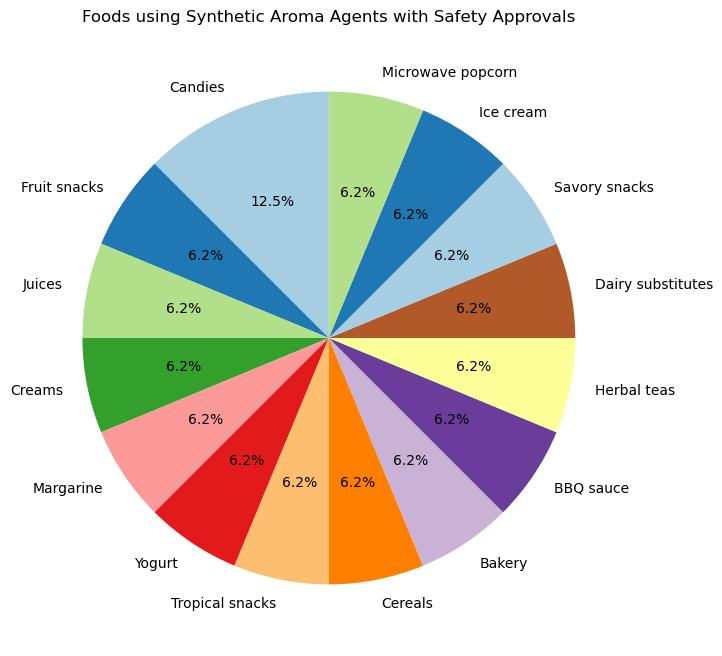

In [ ]:
safety_approval_data = df[df['Causes/Effects'].str.contains('Safety Approval', case=False)]

# Count the number of synthetic aroma agents with safety approvals
synthetic_count = len(safety_approval_data)
print(f'Number of Synthetic Aroma Agents with Safety Approvals: {synthetic_count}')

# Get unique flavours and natural agents
flavours = safety_approval_data['Flavour of Aroma'].unique()
natural_agents = safety_approval_data['Natural Agents'].unique()

print("\nFlavours of Synthetic Aroma Agents with Safety Approvals:")
print(flavours)

print("\nNatural replacements of Synthetic Aroma Agents with Safety Approvals:")
replacement_table = safety_approval_data[['Synthetic Aroma Agent Name', 'Natural Agents']]
print(replacement_table)

# Count occurrences of food items
flavour_counts = safety_approval_data['Food'].value_counts()

# Create a pie chart for visual representation
plt.figure(figsize=(8, 8))
flavour_counts.plot(kind='pie', autopct='%1.1f%%', startangle=90, colors=plt.cm.Paired.colors)
plt.title('Foods using Synthetic Aroma Agents with Safety Approvals')
plt.ylabel('') 
plt.show()
